In [1]:
#Tarea 2 sismología
import matplotlib.pyplot as plt #modulo para graficar
import numpy as np              #este modulo es para trabajar con matrices como en matlab
import pandas as pd             #modulo para leer archivos
import csv
import scipy.optimize as opt

In [209]:
#Caso 1 modelo unicapa
v_o = 0.5
m = 0.5
R_t = 6372
n = 1000
def v(z):
    return v_o + m * z

def p(theta):
    return R_t * np.sin(theta) / v_o

P = np.linspace(0.1,100,200)
    
def z(thet,p_o): #ec para la profundidad sacada de la conservacion del parametro de rayo
    return (R_t*np.sin(thet)-p_o*v_o)/(m*p_o + np.sin(thet))

def r(thet,p_o):
    return R_t - z(thet,p_o)
Zmax = [] #vector con las profunidades maximas para cada P_o

for i in range(len(P)):
    Zmax.append(z(np.pi/2,P[i]))
    i +=1
Profs = [] #vector con la discretizacion del camino ida y vuelta
Vels = [] #velocidades a lo largo de las trayectorias
rs = [] #distancia del rayo al centro en funcion de la prof
dprofs = [] #diferenciales de profundidad
# Con este ciclo creamos la matriz para los diferentes P_o qoe contiene las profunidades hasta el minimo
for i in range(len(Zmax)):
    thing = np.linspace(0,Zmax[i],n,endpoint = False)
    Profs.append(np.concatenate((thing,np.flip(thing,0))))
    i +=1
    
# Con este ciclo obtenemos las matrices de los parametros que necesitamos para caracterizar todos los rayos 
for i in range(len(Profs)):
    Vels.append(v(Profs[i]))
    rs.append(R_t - Profs[i])
    dprofs.append(Profs[i][1] - Profs[i][0])
    i += 1

thetas = []#angulos a partir de p
for i in range(len(Profs)):
    thetas.append(np.arcsin(Vels[i]*P[i]/rs[i]))
    i += 1

dh = [] #Distancias horizontales, las aproximamos al arco que avanza el rayo
for i in range(len(Profs)):
    dh.append(dprofs[i]*np.tan(thetas[i]))
    i += 1
    
dphi = [] #angulo que avanza en cada iteracion, con respecto al centro de la tierra
for i in range(len(Profs)):
    dphi.append(dh[i]/rs[i])
    i += 1

phi = []
for i in range(len(Profs)):
    phi.append(np.cumsum(dphi[i]))
    i += 1
len(Profs)

200

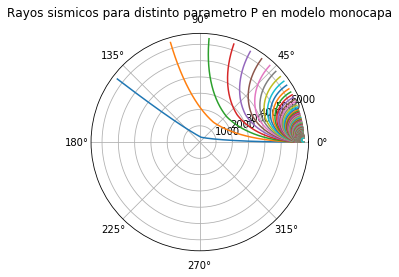

In [195]:
def graf_p(phi,rs):
    plt.figure()
    for i in range(len(phi)):
        plt.polar(phi[i],rs[i])
        i += 1
    plt.title('Rayos sismicos para distinto parametro P en modelo monocapa')
    
    plt.show
    

graf_p(phi, rs)

<function matplotlib.pyplot.show(*args, **kw)>

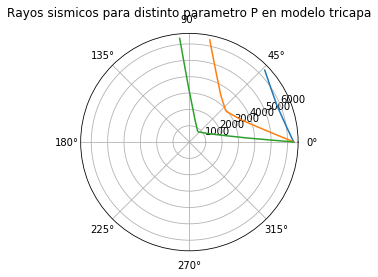

In [221]:
#Caso 2 modelo tricapa
v_1 = 8
v_2 = 9
v_3 = 10
c1 = 1*10**(-4)
c2 = 2*10**(-4)
c3 = 3*10**(-4)
n = 100
# Modelo de velocidades
def v(z):
    if z < 2900:
        return v_1 + z * c1
    if 2900 < z < 5100:
        return v_2 + (z - 2900) * c2
    if 5100 < z < 6372:
        return v_3 + (z - 5100) * c3

# segun resultados analiticos los P que esten entre 419.69 y 796.37 estaran en la primera zona, luego los que estan
# entre 134.6 y 419.69 pertenecen a la segunda zona, finalmente entre 0 y 134.6 llegan hasta la tercera zona.

P1 = 720
P2 = 300
P3 = 67

Z1max = (R_t - P1*v_1)/(1+P1*c1)
Z2max = (R_t - P2*v_2 + 2900*c2)/(1+P2*c2)
Z3max = (R_t - P3*v_3 + 5100*c3)/(1+P3*c3)

profs1 = np.linspace(0,Z1max,n,endpoint=False)
profs2 = np.linspace(0,Z2max,n,endpoint=False)
profs3 = np.linspace(0,Z3max,n,endpoint=False)

profs1 = np.concatenate((profs1,np.flip(profs1,0)))
profs2 = np.concatenate((profs2,np.flip(profs2,0)))
profs3 = np.concatenate((profs3,np.flip(profs3,0)))

dprof1 = profs1[1] - profs1[0]
dprof2 = profs2[1] - profs2[0]
dprof3 = profs3[1] - profs3[0]

vels1 = []
vels2 = []
vels3 = []

for i in range(len(profs1)):
    vels1.append(v(profs1[i]))
    vels2.append(v(profs2[i]))
    vels3.append(v(profs3[i]))
    i +=1

    
rs1 = R_t - profs1
rs2 = R_t - profs2
rs3 = R_t - profs3

thetas1 = []
thetas2 = []
thetas3 = []

for i in range(len(Profs)):
    thetas1.append(np.arcsin(vels1[i]*P1/rs1[i]))
    thetas2.append(np.arcsin(vels2[i]*P2/rs2[i]))
    thetas3.append(np.arcsin(vels3[i]*P3/rs3[i]))
    i += 1

dh1 = dprof1*np.tan(thetas1)
dh2 = dprof2*np.tan(thetas2)
dh3 = dprof3*np.tan(thetas3)

dphi1 = dh1/rs1
dphi2 = dh2/rs2
dphi3 = dh3/rs3

phi1 = np.cumsum(dphi1)
phi2 = np.cumsum(dphi2)
phi3 = np.cumsum(dphi3)

plt.figure()
plt.polar(phi1,rs1)
plt.polar(phi2,rs2)
plt.polar(phi3,rs3)
plt.title('Rayos sismicos para distinto parametro P en modelo tricapa')    
plt.show


In [222]:
profs2


array([   0.        ,   34.64698113,   69.29396226,  103.9409434 ,
        138.58792453,  173.23490566,  207.88188679,  242.52886792,
        277.17584906,  311.82283019,  346.46981132,  381.11679245,
        415.76377358,  450.41075472,  485.05773585,  519.70471698,
        554.35169811,  588.99867925,  623.64566038,  658.29264151,
        692.93962264,  727.58660377,  762.23358491,  796.88056604,
        831.52754717,  866.1745283 ,  900.82150943,  935.46849057,
        970.1154717 , 1004.76245283, 1039.40943396, 1074.05641509,
       1108.70339623, 1143.35037736, 1177.99735849, 1212.64433962,
       1247.29132075, 1281.93830189, 1316.58528302, 1351.23226415,
       1385.87924528, 1420.52622642, 1455.17320755, 1489.82018868,
       1524.46716981, 1559.11415094, 1593.76113208, 1628.40811321,
       1663.05509434, 1697.70207547, 1732.3490566 , 1766.99603774,
       1801.64301887, 1836.29      , 1870.93698113, 1905.58396226,
       1940.2309434 , 1974.87792453, 2009.52490566, 2044.17188